In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier



Let's load our dataset as a dataframe and explore what kind of features are given along with their datatypes

In [2]:
df = pd.read_csv('C:/Users/alexi/Downloads/IX_CancerData_TB.csv', index_col='Unnamed: 0')

In [3]:
df.head()

,Type,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,...,ENSG00000009694.12,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
1,BRCA,0.017243,0.000000,1.557943,0.0,5.017788,6.132192,0.0,0.017186,66.914631,...,0.007595,0.007793,0.0,0.055523,0.028739,10.243520,0.250405,0.0,0.613717,0.0
2,BRCA,0.000000,0.003233,2.697767,0.0,4.903484,9.750896,0.0,0.014376,72.009991,...,0.030789,0.063184,0.0,0.000000,0.000000,16.606613,0.082307,0.0,0.170743,0.0
3,BRCA,0.000000,0.000000,5.831249,0.0,3.054890,17.232771,0.0,0.006936,89.093490,...,0.144831,0.000000,0.0,0.058823,0.121788,20.069360,0.530575,0.0,0.305974,0.0
4,BRCA,0.018671,0.002591,5.013642,0.0,3.972959,14.478933,0.0,0.007975,154.499392,...,0.022615,0.000000,0.0,0.090179,0.062236,18.965261,0.095264,0.0,1.558708,0.0
5,BRCA,0.000000,0.003404,3.739011,0.0,2.789155,15.336983,0.0,0.050073,143.640545,...,0.040526,0.027722,0.0,0.276519,0.040894,12.879618,0.125190,0.0,0.488011,0.0


In [4]:
df.shape

(2109, 58441)

In [5]:
df.columns

Index(['Type', 'ENSG00000242268.2', 'ENSG00000270112.3', 'ENSG00000167578.15',
       'ENSG00000273842.1', 'ENSG00000078237.5', 'ENSG00000146083.10',
       'ENSG00000225275.4', 'ENSG00000158486.12', 'ENSG00000198242.12',
       ...
       'ENSG00000009694.12', 'ENSG00000186115.11', 'ENSG00000216352.1',
       'ENSG00000267117.1', 'ENSG00000273233.1', 'ENSG00000105063.17',
       'ENSG00000231119.2', 'ENSG00000280861.1', 'ENSG00000123685.7',
       'ENSG00000181518.3'],
      dtype='object', length=58441)

## <font color='#eb3483'> EDA </font>
Let's look at the general statistics and do some cleaning

In [6]:
df.describe()

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000009694.12,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,...,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,0.100787,0.014563,3.635264,0.003620,4.182546,13.169315,0.003098,0.200361,191.930469,0.167644,...,0.743316,3.191828,0.001021,0.212433,0.066586,15.504560,0.449303,0.002230,0.863953,0.003166
std,0.311553,0.068489,2.350044,0.036528,4.770590,7.283324,0.040347,0.554549,160.992823,0.525611,...,1.982985,12.021718,0.009006,0.295863,0.124356,7.051332,1.092886,0.036859,1.015627,0.027137
min,0.000000,0.000000,0.435606,0.000000,0.173593,0.531652,0.000000,0.000000,18.880745,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.898690,0.000000,0.000000,0.014896,0.000000
25%,0.000000,0.000000,2.182142,0.000000,2.328920,8.434296,0.000000,0.018071,109.160270,0.027155,...,0.016733,0.005259,0.000000,0.047337,0.000000,10.842311,0.091179,0.000000,0.304265,0.000000
50%,0.000000,0.000000,3.058661,0.000000,3.590556,11.763797,0.000000,0.077476,156.024028,0.068786,...,0.095683,0.032998,0.000000,0.122367,0.036831,14.466283,0.203892,0.000000,0.550797,0.000000
75%,0.066865,0.007000,4.420560,0.000000,5.146582,16.141889,0.000000,0.196730,224.153528,0.142558,...,0.640128,0.334817,0.000000,0.256152,0.090022,18.971165,0.414331,0.000000,1.041430,0.000000
max,6.240953,1.167097,38.696938,0.769511,187.851601,61.809897,1.681737,12.721510,3887.038686,9.731571,...,29.166522,158.911979,0.333702,3.552154,2.767841,94.792173,19.762116,1.288014,13.888980,0.662189


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 1 to 2109
Columns: 58441 entries, Type to ENSG00000181518.3
dtypes: float64(58440), object(1)
memory usage: 940.4+ MB


In [8]:
# how many cancer types are there
# Find unique values of a column
print(df['Type'].unique())

['BRCA' 'KIRC' 'LUAD' 'LUSC' 'HNSC' 'PRAD' 'BLCA' 'LIHC' 'OV' 'COAD'
 'KIRP']


Lets's look at how the target class is distributed

In [17]:
df['Type'].value_counts(normalize=False)

OV      207
BLCA    202
PRAD    194
COAD    193
LUAD    190
HNSC    190
KIRC    189
BRCA    188
LUSC    187
KIRP    187
LIHC    182
Name: Type, dtype: int64

In [9]:
# All independent features are numerical and the target feature is converted to categorical.:
df['Type'] = df['Type'].astype('category')

In [10]:
# Delete columns containing either 66% or more zeros
# Max number of zeros 
threshold = 0.66*2109

drops = [l[0] for l in list(filter(lambda x: x[1] > threshold,[(col, (df.groupby((df[col] != 0).cumsum()).cumcount()).max()) 
 for col in df.columns]))]

df_cleaned = df.drop(drops, axis = 1)
df_cleaned

,Type,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,...,ENSG00000009694.12,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
1,BRCA,0.017243,0.000000,1.557943,0.0,5.017788,6.132192,0.0,0.017186,66.914631,...,0.007595,0.007793,0.0,0.055523,0.028739,10.243520,0.250405,0.0,0.613717,0.0
2,BRCA,0.000000,0.003233,2.697767,0.0,4.903484,9.750896,0.0,0.014376,72.009991,...,0.030789,0.063184,0.0,0.000000,0.000000,16.606613,0.082307,0.0,0.170743,0.0
3,BRCA,0.000000,0.000000,5.831249,0.0,3.054890,17.232771,0.0,0.006936,89.093490,...,0.144831,0.000000,0.0,0.058823,0.121788,20.069360,0.530575,0.0,0.305974,0.0
4,BRCA,0.018671,0.002591,5.013642,0.0,3.972959,14.478933,0.0,0.007975,154.499392,...,0.022615,0.000000,0.0,0.090179,0.062236,18.965261,0.095264,0.0,1.558708,0.0
5,BRCA,0.000000,0.003404,3.739011,0.0,2.789155,15.336983,0.0,0.050073,143.640545,...,0.040526,0.027722,0.0,0.276519,0.040894,12.879618,0.125190,0.0,0.488011,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,KIRP,0.051162,0.035495,1.633119,0.0,3.713046,11.025967,0.0,0.004856,97.437901,...,0.101405,3.283387,0.0,0.247111,0.000000,15.362268,0.120482,0.0,0.053557,0.0
2106,KIRP,1.285180,0.002050,3.671020,0.0,3.854596,12.135606,0.0,0.110772,72.169839,...,3.085640,0.056747,0.0,0.142697,0.000000,13.727288,0.197126,0.0,0.286078,0.0
2107,KIRP,0.020972,0.008730,1.490144,0.0,3.704053,12.869675,0.0,0.183140,116.352616,...,0.599253,0.004739,0.0,0.000000,0.000000,10.667128,0.370400,0.0,0.032931,0.0
2108,KIRP,0.036165,0.000000,2.126202,0.0,3.907258,10.615778,0.0,0.149328,98.345480,...,0.605300,0.286032,0.0,0.058226,0.000000,11.744629,0.283886,0.0,0.075717,0.0


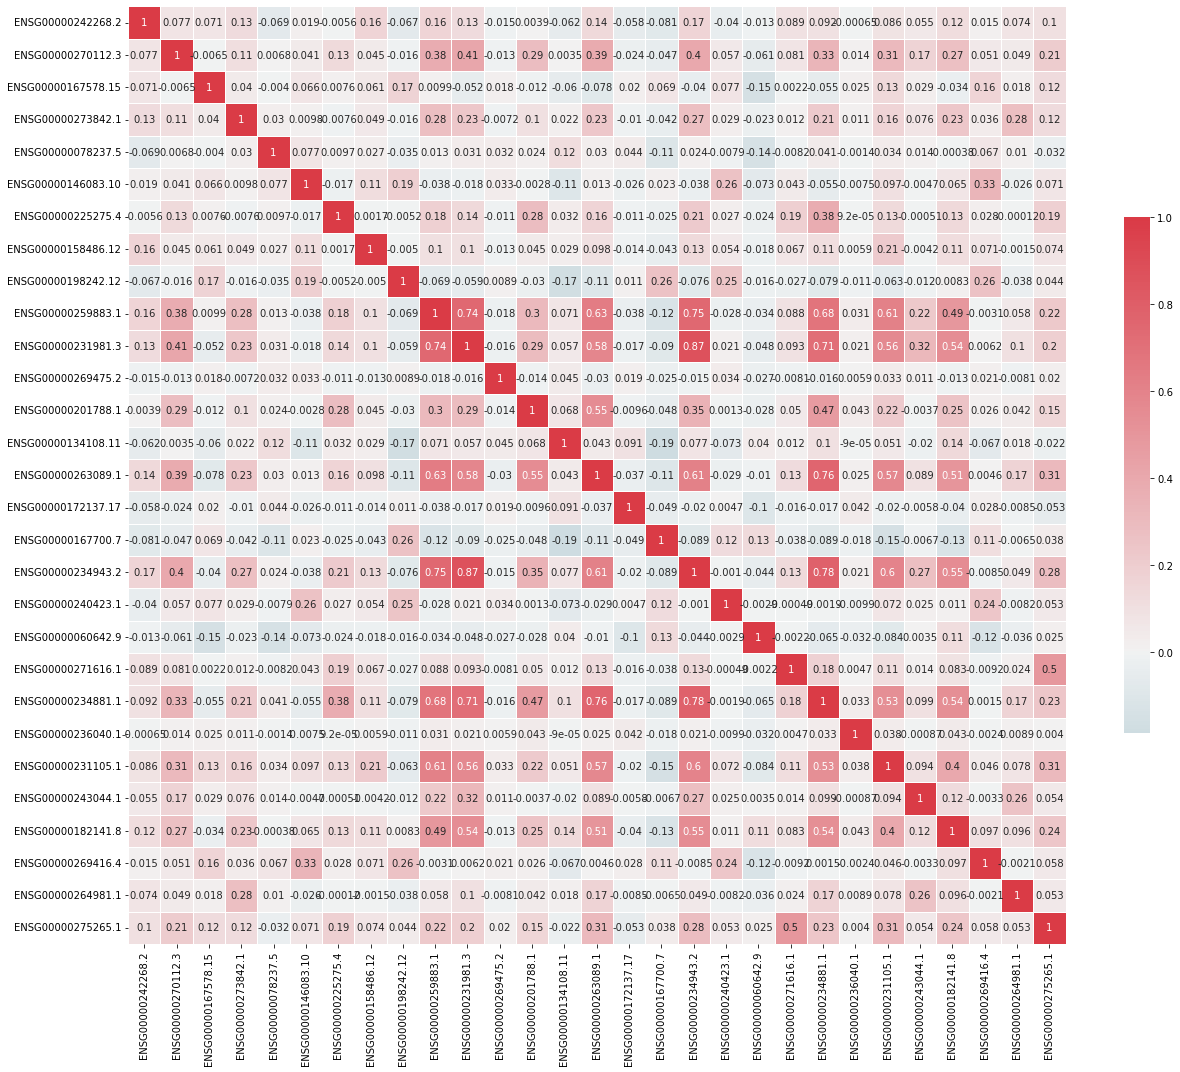

In [11]:
corr = df_cleaned.iloc[:,1:30].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 19))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## <font color='#eb3483'> Feature Selection </font>

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested. In this case we are aiming to predict the cancer type based on the various genetic features in the dataset which will be relevant when we build our classification model since having irrelevant features in your data can decrease the accuracy of many models.

Three benefits of performing feature selection before modeling your data are:

- Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
- Improves Accuracy: Less misleading data means modeling accuracy improves.
- Reduces Training Time: Less data means that algorithms train faster.

In [182]:
# Determine most variably expressed genes and subset
num_mad_genes = 5000
dfc = df_cleaned.iloc[:,1:]
mad_genes = dfc.mad(axis=0).sort_values(ascending=False)
top_mad_genes = mad_genes.iloc[0:num_mad_genes, ].index
subset_df = dfc.loc[:, top_mad_genes]

In [13]:
subset_df

,ENSG00000198938.2,ENSG00000198712.1,ENSG00000198804.2,ENSG00000198886.2,ENSG00000210082.2,ENSG00000198899.2,ENSG00000198840.2,ENSG00000198727.2,ENSG00000087086.12,ENSG00000198763.3,...,ENSG00000169733.10,ENSG00000100605.15,ENSG00000154447.13,ENSG00000077235.16,ENSG00000149743.12,ENSG00000136868.10,ENSG00000145604.14,ENSG00000146083.10,ENSG00000023892.10,ENSG00000090054.12
1,5074.278246,5715.880814,5004.261682,5729.058331,4935.502794,4306.842875,2313.986776,2969.173798,1445.119139,2832.470551,...,4.203399,5.979691,8.380975,12.599597,7.101906,55.673849,13.257400,6.132192,9.904845,21.115238
2,6194.761496,4039.803827,6160.714848,3440.555180,3892.533127,2478.191087,2143.519988,2975.924023,1718.066499,2554.411329,...,8.834767,22.063259,13.937492,21.096832,7.860170,23.171626,4.540163,9.750896,10.823341,25.046333
3,4332.811846,4166.421909,5240.735453,4351.111406,2128.511701,2877.755003,1933.865667,2651.692939,981.969369,1382.033304,...,12.141512,25.650167,25.230492,12.954705,15.857940,7.872814,2.798931,17.232771,5.269707,15.729016
4,11001.114329,15194.472213,10281.684334,9390.479701,5453.793771,9152.916688,7389.151377,6590.892765,2148.404575,9441.549791,...,18.181609,25.168110,8.454931,20.108103,14.653966,10.301015,4.218401,14.478933,12.459407,13.992010
5,4798.912802,3297.681653,3537.835993,4577.812422,2819.806095,3783.386260,3885.520011,2857.009352,2461.139530,2508.446424,...,11.750518,11.780736,10.723764,13.512264,11.201271,15.694596,3.545886,15.336983,9.186080,17.154004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,38063.236092,34408.669939,38082.644667,25912.848638,22285.249633,12000.011974,9716.824886,18118.365673,11486.717226,7647.256060,...,14.624131,15.750095,7.214693,11.476955,18.113372,15.551819,1.211792,11.025967,0.842120,11.598695
2106,20567.426446,14400.471052,11779.036445,18538.274162,6880.640144,13108.230114,10852.244175,10471.958929,986.576158,9835.550301,...,30.997995,8.731702,2.172619,19.077870,18.204940,5.535634,2.378101,12.135606,1.899836,14.003445
2107,11026.649229,9386.138610,4135.352902,8798.891617,3558.809789,8480.402675,8721.293829,6855.200068,1361.358568,3377.951588,...,13.044727,14.745214,10.481845,16.413622,13.636904,6.932449,1.742417,12.869675,1.076534,23.377209
2108,21100.208063,14908.518200,16522.926209,14236.784352,8473.354640,9380.123349,8794.091996,8153.781722,6720.042460,7733.061745,...,17.738389,9.884108,6.980951,11.017643,15.487820,11.754447,1.726555,10.615778,3.087351,13.737242


Final technique: Identified a dimensionality reduction technique which chooses the  5,000 most variably expressed genes by median absolute deviation

In [14]:
dft = df_cleaned.iloc[:,0]
dft

1       BRCA
2       BRCA
3       BRCA
4       BRCA
5       BRCA
        ... 
2105    KIRP
2106    KIRP
2107    KIRP
2108    KIRP
2109    KIRP
Name: Type, Length: 2109, dtype: category
Categories (11, object): ['BLCA', 'BRCA', 'COAD', 'HNSC', ..., 'LUAD', 'LUSC', 'OV', 'PRAD']

In [15]:
dft = dft.to_frame()

In [16]:
dft

,Type
1,BRCA
2,BRCA
3,BRCA
4,BRCA
5,BRCA
...,...
2105,KIRP
2106,KIRP
2107,KIRP
2108,KIRP


In [17]:

res5 = pd.concat([dft, subset_df], axis=1)
res5

,Type,ENSG00000198938.2,ENSG00000198712.1,ENSG00000198804.2,ENSG00000198886.2,ENSG00000210082.2,ENSG00000198899.2,ENSG00000198840.2,ENSG00000198727.2,ENSG00000087086.12,...,ENSG00000169733.10,ENSG00000100605.15,ENSG00000154447.13,ENSG00000077235.16,ENSG00000149743.12,ENSG00000136868.10,ENSG00000145604.14,ENSG00000146083.10,ENSG00000023892.10,ENSG00000090054.12
1,BRCA,5074.278246,5715.880814,5004.261682,5729.058331,4935.502794,4306.842875,2313.986776,2969.173798,1445.119139,...,4.203399,5.979691,8.380975,12.599597,7.101906,55.673849,13.257400,6.132192,9.904845,21.115238
2,BRCA,6194.761496,4039.803827,6160.714848,3440.555180,3892.533127,2478.191087,2143.519988,2975.924023,1718.066499,...,8.834767,22.063259,13.937492,21.096832,7.860170,23.171626,4.540163,9.750896,10.823341,25.046333
3,BRCA,4332.811846,4166.421909,5240.735453,4351.111406,2128.511701,2877.755003,1933.865667,2651.692939,981.969369,...,12.141512,25.650167,25.230492,12.954705,15.857940,7.872814,2.798931,17.232771,5.269707,15.729016
4,BRCA,11001.114329,15194.472213,10281.684334,9390.479701,5453.793771,9152.916688,7389.151377,6590.892765,2148.404575,...,18.181609,25.168110,8.454931,20.108103,14.653966,10.301015,4.218401,14.478933,12.459407,13.992010
5,BRCA,4798.912802,3297.681653,3537.835993,4577.812422,2819.806095,3783.386260,3885.520011,2857.009352,2461.139530,...,11.750518,11.780736,10.723764,13.512264,11.201271,15.694596,3.545886,15.336983,9.186080,17.154004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,KIRP,38063.236092,34408.669939,38082.644667,25912.848638,22285.249633,12000.011974,9716.824886,18118.365673,11486.717226,...,14.624131,15.750095,7.214693,11.476955,18.113372,15.551819,1.211792,11.025967,0.842120,11.598695
2106,KIRP,20567.426446,14400.471052,11779.036445,18538.274162,6880.640144,13108.230114,10852.244175,10471.958929,986.576158,...,30.997995,8.731702,2.172619,19.077870,18.204940,5.535634,2.378101,12.135606,1.899836,14.003445
2107,KIRP,11026.649229,9386.138610,4135.352902,8798.891617,3558.809789,8480.402675,8721.293829,6855.200068,1361.358568,...,13.044727,14.745214,10.481845,16.413622,13.636904,6.932449,1.742417,12.869675,1.076534,23.377209
2108,KIRP,21100.208063,14908.518200,16522.926209,14236.784352,8473.354640,9380.123349,8794.091996,8153.781722,6720.042460,...,17.738389,9.884108,6.980951,11.017643,15.487820,11.754447,1.726555,10.615778,3.087351,13.737242


In [57]:
res6 =  pd.concat([dft, subset_df], axis=1)

In [18]:
df_cleaned.loc[:,"ENSG00000198712.1"]

1        5715.880814
2        4039.803827
3        4166.421909
4       15194.472213
5        3297.681653
            ...     
2105    34408.669939
2106    14400.471052
2107     9386.138610
2108    14908.518200
2109     6749.269299
Name: ENSG00000198712.1, Length: 2109, dtype: float64

In [19]:
df_cleaned.loc[:,"ENSG00000242268.2"]

1       0.017243
2       0.000000
3       0.000000
4       0.018671
5       0.000000
          ...   
2105    0.051162
2106    1.285180
2107    0.020972
2108    0.036165
2109    0.100843
Name: ENSG00000242268.2, Length: 2109, dtype: float64

## <font color='#eb3483'> Data Visualization </font>

### <font color='#eb3483'> PCA </font>
Principal component analysis (PCA) is a mathematical procedure that transforms a number of (possibly) correlated variables into a smaller number of uncorrelated variables called principal components. The data has been reduced to 5000 dimensions, but it can be reduced further to see whether variables can be separated into clusters. There are 11 target classes and we need want to see if they can be linearly seperable. 

Projecting 5000-dimensional data to 2D


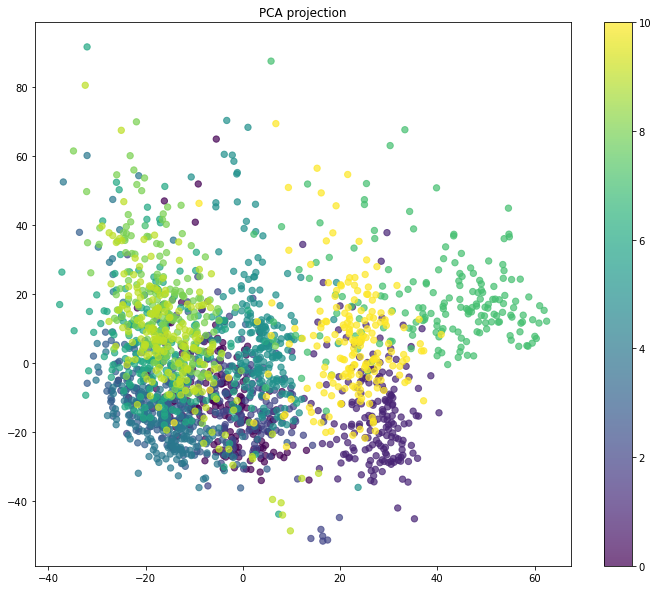

In [37]:


pca = PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=res5['Type'], alpha=0.7, s=40);
plt.colorbar()
plt.title('PCA projection')
plt.style.use('seaborn-muted');

### <font color='#eb3483'> t-SNE </font>
t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

With t-SNE, the picture below looks a little better and performs better for this dataset. Moreover, PCA makes independent variables less interpretable.

In [30]:
res5['Type'] = df['Type'].map({'BRCA': 0, 'KIRC': 1, 'LUAD': 2, 'LUSC': 3, 'HNSC': 4, 'PRAD': 5, 'BLCA': 6, 'LIHC': 7, 'OV': 8, 'COAD': 9, 'KIRP': 10})
X3 = res5.drop('Type',axis = 1)
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X3)

C:\Users\alexi\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\alexi\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2109 samples in 0.120s...
[t-SNE] Computed neighbors for 2109 samples in 0.815s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2109
[t-SNE] Computed conditional probabilities for sample 2000 / 2109
[t-SNE] Computed conditional probabilities for sample 2109 / 2109
[t-SNE] Mean sigma: 20.907798
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.505142
[t-SNE] KL divergence after 2000 iterations: 1.032217


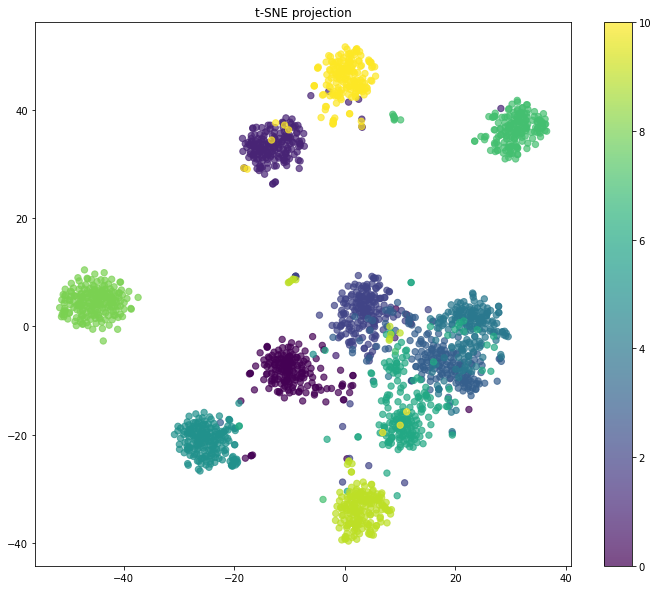

In [36]:
# Invoke the TSNE method
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000,random_state = 17)

df_tsne_scaled = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12,10))
plt.scatter(df_tsne_scaled[:, 0], df_tsne_scaled[:, 1], c=res5['Type'], 
            alpha=0.7, s=40)
plt.colorbar()
plt.title('t-SNE projection');

### Normalization
Before scaling numerical features, let's check whether they follow normal distribution:

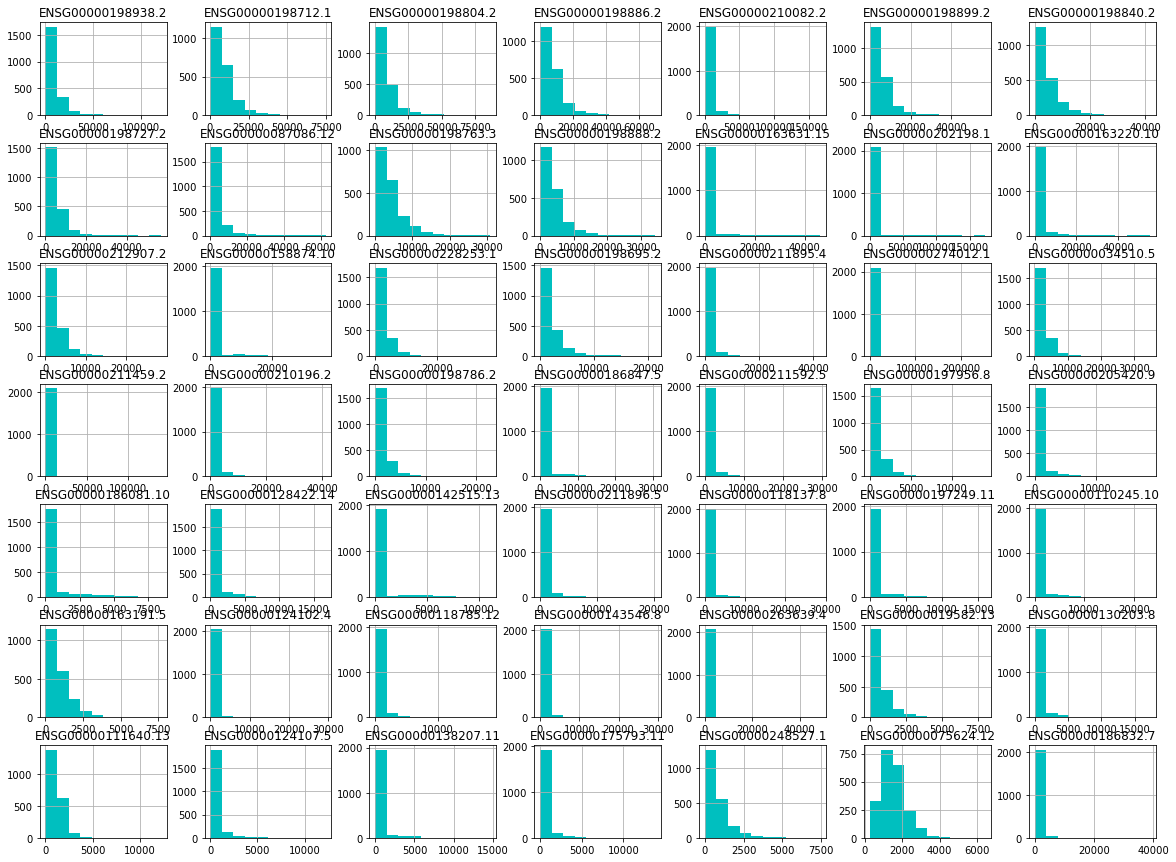

In [40]:
X = res5.iloc[:, 1:50]
(X+0.001).hist(figsize=(20, 15), color = 'c');

Using a subset of 50 features, one can see that most of the distributions are skewed to the right, i.e. rise very sharply in the beginning (i.e. for very small values near zero), peaks out early, then decreases sharply and leave the long tail. Each histogram is similar to lognormal distribution, a continuous distribution in which the logarithm of a variable has a normal distribution. For algorithms like linear regressions and kNN, numerical features have to be scaled in order to avoid over fitting and make more accurate predictions. And to be scaled numerical features must follow normal distribution. I will apply log function to make features normally

In [42]:
X2 = res5.iloc[:, 1:]
X_log2 = np.log(X2+0.001)

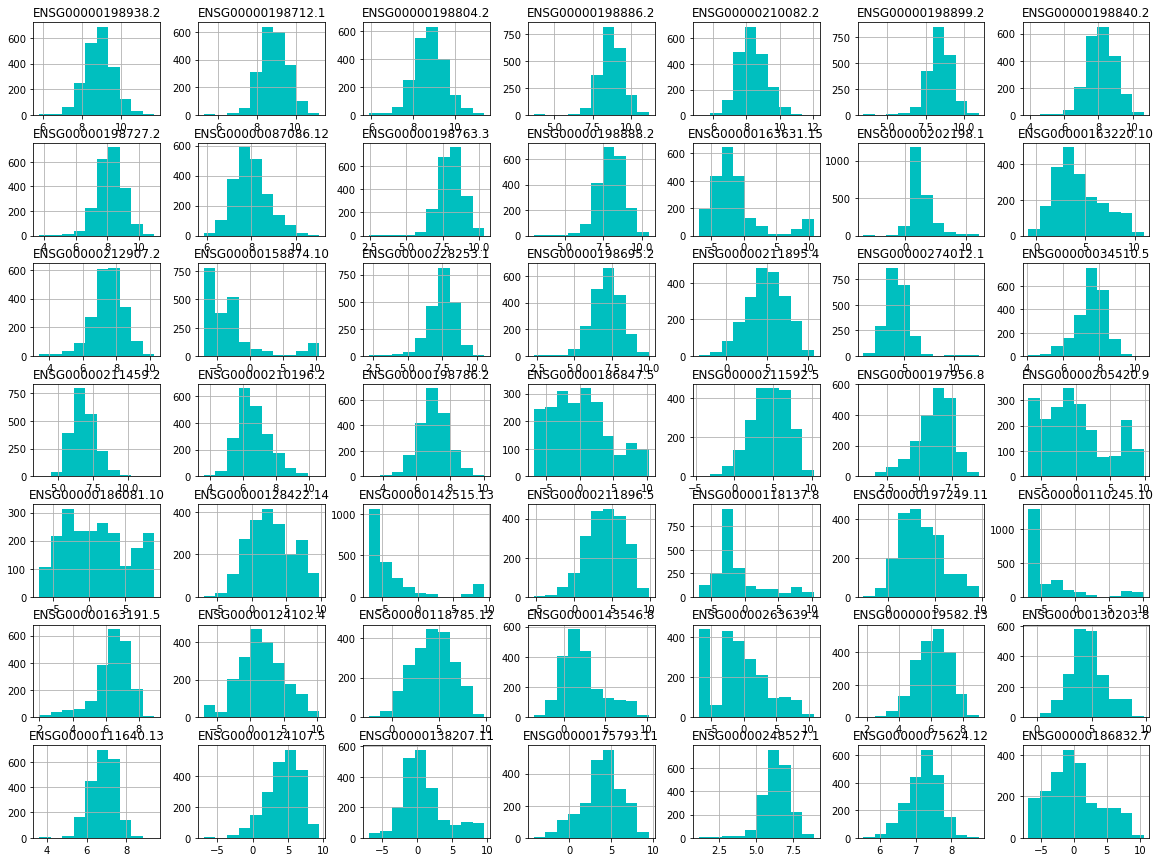

In [41]:
#Log transformation
X = res5.iloc[:, 1:50]
X_log = np.log(X+0.001)
X_log.hist(figsize=(20, 15), color = 'c');

### KNN
K-Nearest Neighbours (KNN) is an algorithm which assumes that ‘k’ data points with similar characteristics exist close to each other and follow a similar pattern.
So in order to find the cancer type of a new data point (which in our case will be the test data), we can simply look at class (the cancer type) of the neighbouring K data points. The classification is done by a plurality vote of its neighbours, with the object being assigned to the class most common among its K nearest neighbours.

### Cons
❌ Outlier sensitivity

❌ Imbalanced data causes problems.

In [145]:
X3 = res6.iloc[:, 1:]
X_log3 = np.log(X3+0.001)
y_data = res6['Type']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_log3, y_data,test_size=0.4, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [147]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[74  0  1  1  0  0  0  0  1  0  0]
 [ 1 74  0  0  0  0  0  0  0  0  0]
 [ 0  0 85  0  0  0  0  0  1  0  0]
 [ 3  0  0 68  0  0  0  0  1  0  0]
 [ 1  0  0  0 73  3  0  0  0  0  0]
 [ 1  0  0  0  5 63  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0]
 [ 1  0  0  0  0  0  0 74  1  0  0]
 [ 0  0  0  3  0  0  0  2 74  0  0]
 [ 0  0  0  0  0  0  0  0  0 92  0]
 [ 0  0  0  0  0  0  0  0  0  0 77]]
Classification Report:
              precision    recall  f1-score   support

        BLCA       0.91      0.96      0.94        77
        BRCA       1.00      0.99      0.99        75
        COAD       0.99      0.99      0.99        86
        HNSC       0.94      0.94      0.94        72
        KIRC       0.94      0.95      0.94        77
        KIRP       0.95      0.91      0.93        69
        LIHC       1.00      1.00      1.00        64
        LUAD       0.97      0.97      0.97        76
        LUSC       0.95      0.94      0.94        79
          OV       1.

### Decision tree
A decision tree classifier is an approach for multiclass classification. It poses a set of questions to the dataset (in this case each of the genetic features). The decision tree classification algorithm can be visualized on a binary tree. On the root and each of the internal nodes, a question is posed and the data on that node is further split into separate records that have different characteristics. 

### Cons
❌It can’t be used in big data: If the size of data is too big, then one single tree may grow a lot of nodes which might result in complexity and leads to overfitting.

❌There is no guarantee to return the 100% efficient decision tree

In [112]:
#Dataset preprocessing - scaled data
from sklearn import preprocessing
all_features = res6.drop(["Type"],axis=1)
target_feature = res6["Type"]
x = all_features.values.astype(float) #returns a numpy array of type float
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_features = pd.DataFrame(x_scaled)
scaled_features.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.039551,0.073927,0.054032,0.081669,0.028654,0.075701,0.054325,0.051783,0.017480,0.091340,...,0.056114,0.047558,0.078059,0.204795,0.086406,0.949688,0.107791,0.091395,0.116428,0.381241
1,0.048895,0.051500,0.067491,0.048816,0.022382,0.043319,0.050236,0.051903,0.021858,0.082336,...,0.125599,0.209867,0.131067,0.359110,0.097124,0.389408,0.034546,0.150449,0.127383,0.454396
2,0.033368,0.053195,0.056784,0.061888,0.011774,0.050395,0.045207,0.046169,0.010050,0.044374,...,0.175210,0.246064,0.238801,0.211244,0.210178,0.125684,0.019915,0.272546,0.061146,0.281007
3,0.088976,0.200754,0.115450,0.134229,0.031771,0.161517,0.176063,0.115833,0.028762,0.305343,...,0.265829,0.241200,0.078765,0.341154,0.193159,0.167542,0.031842,0.227606,0.146896,0.248682
4,0.037254,0.041570,0.036966,0.065142,0.015931,0.066432,0.092022,0.049800,0.033779,0.080848,...,0.169344,0.106100,0.100409,0.221370,0.144353,0.260517,0.026191,0.241608,0.107856,0.307525


The overall score for Decision Tree classifier is: 84.26


Text(0.5, 1.0, 'Decision Tree Confusion_matrix')

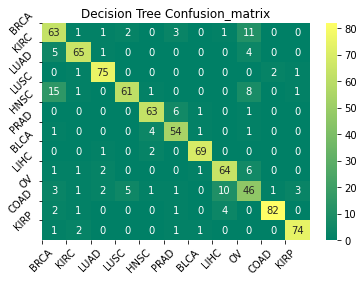

In [177]:
#Decision tree
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
import seaborn as sns

X_train,X_test,y_train,y_test = train_test_split(scaled_features,target_feature,test_size=0.4,random_state=40)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
classes=['BRCA', 'KIRC', 'LUAD', 'LUSC', 'HNSC', 'PRAD', 'BLCA', 'LIHC', 'OV', 'COAD','KIRP']

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='sqrt')
model.fit(X_train,y_train)
dt_pred=model.predict(X_test)
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
result_tree=cross_val_score(model,scaled_features,target_feature,cv=10,scoring='accuracy')
print('The overall score for Decision Tree classifier is:',round(result_tree.mean()*100,2))
y_pred = cross_val_predict(model,scaled_features,target_feature,cv=10)
sns.heatmap(confusion_matrix(dt_pred,y_test),annot=True,cmap='summer')
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes, rotation=45)
plt.title('Decision Tree Confusion_matrix')

In [178]:
#Visualizing decision tree
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image  
from sklearn import tree


dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=res6.columns[1:],
    filled=True,
    rounded=True,
    special_characters=True)


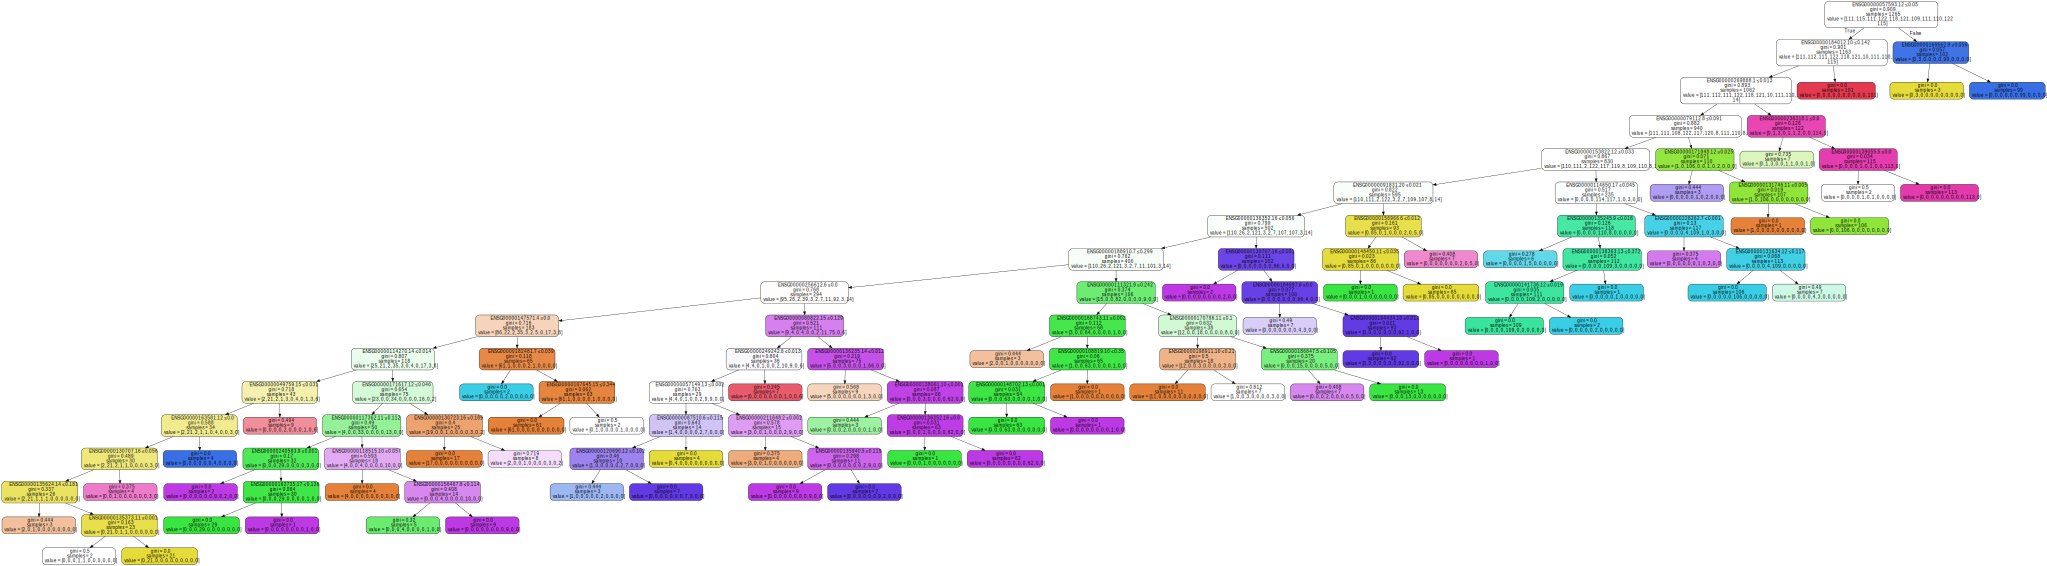

In [179]:
graph = graphviz.Source(dot_data)
graph

In [180]:
graph.format = "png"
graph.render("decisiontree2")

'decisiontree2.png'

### SVM
The objective of the support vector machine algorithm is to find a line/hyperplane in an N-dimensional space(N = the number of features) that classifies data into classes by taking the data as an input and outputs a line that separates those classes if possible. In its most basic form, SVM only supports binary classification, but in order to implement it in a multiclass dataset like this one, it breaks down the multiclass classification problem into subproblems which are binary classification problems. So, after this we get binary classifiers per each pair of classes.

### Cons
❌ It doesn’t perform very well when the data set has more noise i.e. target classes are overlapping (might be an issue as there is gentic overlap for the different cancers)

❌ As the support vector classifier works by placing data points, above and below the classifying hyperplane there is no probabilistic clarification for the classification.

The overall score for Support Vector machine classifier is: 96.4


Text(0.5, 1.0, 'SVM Confusion_matrix')

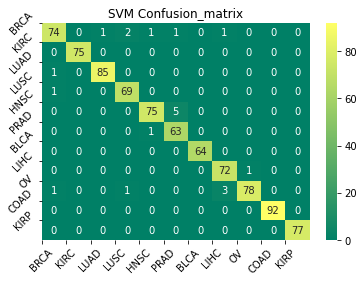

In [169]:
#Linear SVM 
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC, LinearSVC
classes=['BRCA', 'KIRC', 'LUAD', 'LUSC', 'HNSC', 'PRAD', 'BLCA', 'LIHC', 'OV', 'COAD','KIRP']
model = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')
model.fit(X_train,y_train)
pred_svm = model.predict(X_test)
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
result_svm=cross_val_score(model,scaled_features,target_feature,cv=10,scoring='accuracy')
print('The overall score for Support Vector machine classifier is:',round(result_svm.mean()*100,2))
y_pred = cross_val_predict(model,scaled_features,target_feature,cv=10)
sns.heatmap(confusion_matrix(pred_svm,y_test),annot=True,cmap='summer')
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes, rotation=45)
plt.title('SVM Confusion_matrix')

### Naive Bayes
It is a classification algorithm that is suitable for multiclass classification example like this dataset. It is a supervised classification technique used to classify future objects by assigning classes to instances using conditional probability. It is essentially a probabilistic classifier that returns the probability of a test point belonging to a class rather than the label of the test point 

The overall score for Gaussian Naive Bayes classifier is: 93.36


Text(0.5, 1.0, 'Naive Bayes Confusion_matrix')

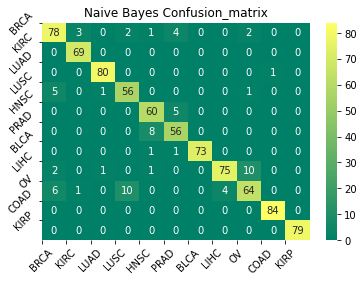

In [183]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
classes=['BRCA', 'KIRC', 'LUAD', 'LUSC', 'HNSC', 'PRAD', 'BLCA', 'LIHC', 'OV', 'COAD','KIRP']
model= GaussianNB()
model.fit(X_train,y_train)
gnb_pred=model.predict(X_test)
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(model,scaled_features,target_feature,cv=10,scoring='accuracy')
print('The overall score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,scaled_features,target_feature,cv=10)
sns.heatmap(confusion_matrix(gnb_pred,y_test),annot=True,cmap='summer')
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes, rotation=45)
plt.title('Naive Bayes Confusion_matrix')

Based on the confusion matrix results above, we get a high classification score. However it's not certain whether this is a suitable model even though this method is fast and easy to implement and interpret since they provide a probabilistic prediction.


In [184]:
#Comparing all classifiers
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 
               'Naive Bayes', 'Decision Tree'],
    'Score': [result_svm.mean()*100, result2*100, 
              result_gnb.mean()*100, result_tree.mean()*100]})
models.sort_values(by='Score',ascending=False)

,Model,Score
1,KNN,96.919431
0,Support Vector Machines,96.396750
2,Naive Bayes,93.362221
3,Decision Tree,84.256601


In [157]:

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [158]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [161]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)
print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

Accuracy Linear Kernel: 0.976303317535545
Accuracy Polynomial Kernel: 0.9786729857819905
Accuracy Radial Basis Kernel: 0.09123222748815166
Accuracy Sigmoid Kernel: 0.9549763033175356


## <font color='#eb3483'> Summary </font>

For further data cleaning, I am not going to remove any outliers since it may be useful for diagnosis purposes and most complex models are not that sensitive too outliers. So I don't think it's appropriate and in order to keep as much data as possible. Further, since there are so many features, to avoid multicollinearity, I will consider further removing some of the features to prevent overfitting. From the EDA even though it is just a subset, when I did a heatmap to see the correlations of some features, there were some genetic features which are highly correlated, which is gonna makes sense for certain cancers. 

For further model analysis I will attempt using a random forest algorithm since it consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by is more accurate than that of any individual tree.(which is a good step forward considering the decision tree model accuracy score was the lowest of all the algorithms attempted so far) 